In [3]:
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler


In [5]:
df1 = pd.read_csv('application_record.csv')
df2 = pd.read_csv('credit.csv')
df = df1.merge(df2, how='inner', on=['ID'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [8]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-9,C


In [9]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [10]:
df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

In [11]:
print(df.groupby('FLAG_MOBIL').size())
print(df.groupby('FLAG_WORK_PHONE').size())
print(df.groupby('FLAG_PHONE').size())
print(df.groupby('FLAG_EMAIL').size())
print(df.groupby('STATUS').size())

FLAG_MOBIL
1    777715
dtype: int64
FLAG_WORK_PHONE
0    597427
1    180288
dtype: int64
FLAG_PHONE
0    543650
1    234065
dtype: int64
FLAG_EMAIL
0    706418
1     71297
dtype: int64
STATUS
0    290654
1      8747
2       801
3       286
4       214
5      1527
C    329536
X    145950
dtype: int64


In [12]:
st = {'C' : 1, 'X' : 1,'0' : 0 ,'1' : 0,'2' : 0,'3' : 0,'4' : 0,'5' : 0}
df['STATUS'] = df['STATUS'].map(st).astype(int)

object_list = df.describe(include=object).columns
df[object_list] = df[object_list].apply(lambda x: x.astype("category").cat.codes)

In [13]:
df.drop(['ID', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'FLAG_MOBIL'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  int8   
 1   FLAG_OWN_CAR         777715 non-null  int8   
 2   FLAG_OWN_REALTY      777715 non-null  int8   
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  int8   
 6   NAME_EDUCATION_TYPE  777715 non-null  int8   
 7   NAME_FAMILY_STATUS   777715 non-null  int8   
 8   NAME_HOUSING_TYPE    777715 non-null  int8   
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  CNT_FAM_MEMBERS      777715 non-null  float64
 12  MONTHS_BALANCE       777715 non-null  int64  
 13  STATUS               777715 non-null  int32  
dtypes: float64(2), int32(1), int64(4), int8(7)
memory usage: 43.8 MB


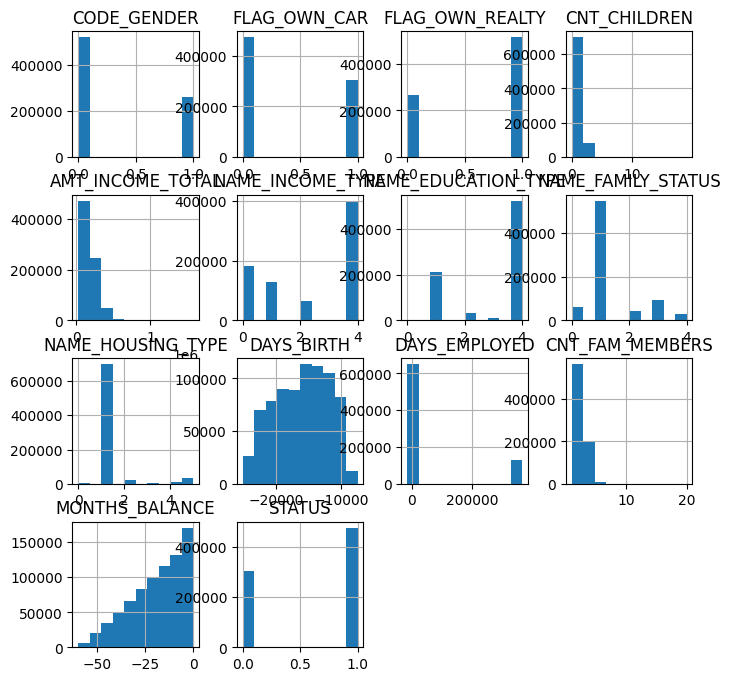

None


In [15]:
df.hist(figsize=(8,8))
print(plt.show())

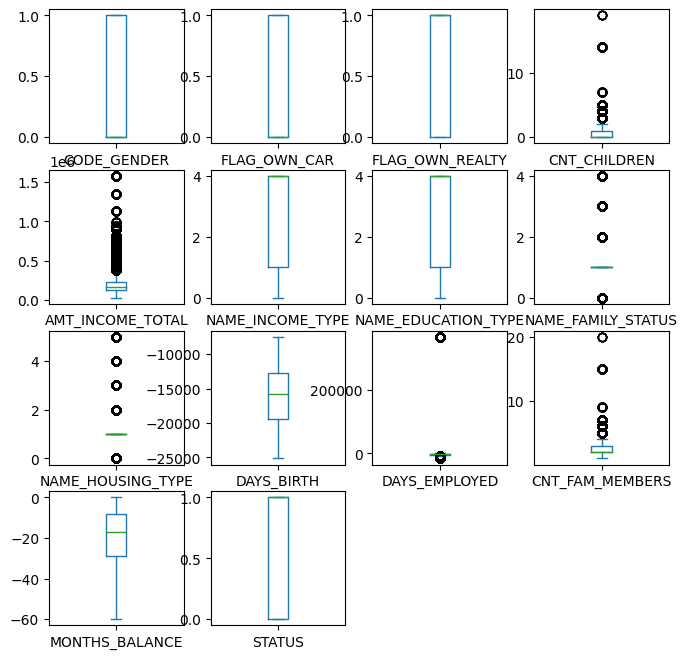

In [16]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(8,8)) 
plt.show() 

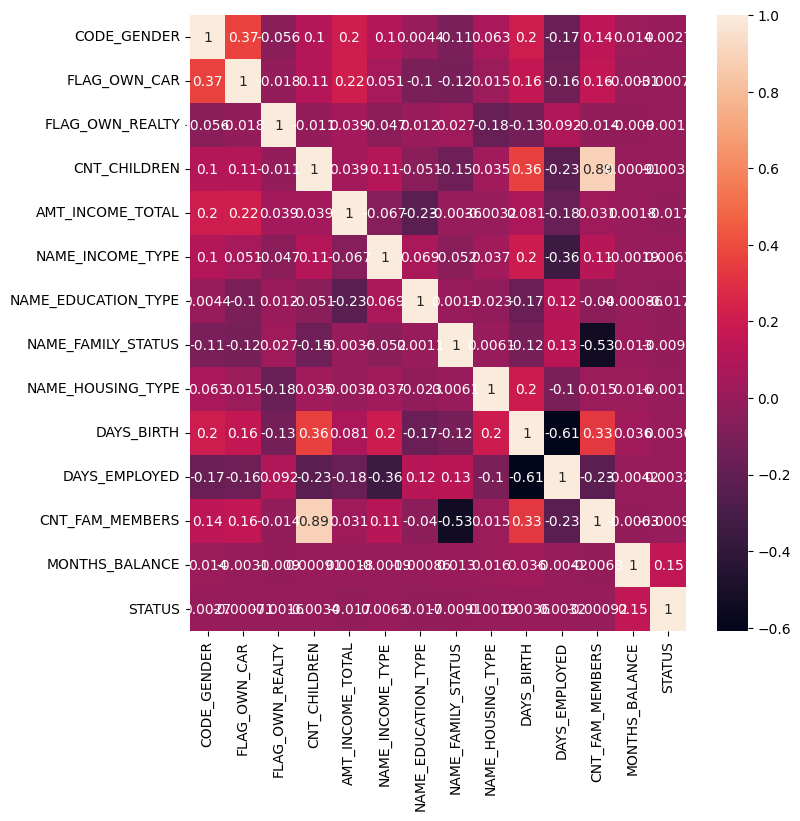

In [17]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True) 
plt.show()

<Axes: >

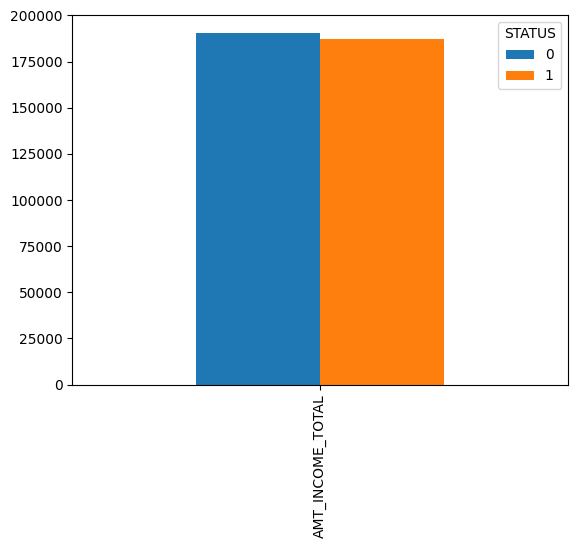

In [18]:
df.groupby('STATUS')[['AMT_INCOME_TOTAL']].mean().T.plot(kind = 'bar')

In [19]:
df[['FLAG_OWN_REALTY','AMT_INCOME_TOTAL','STATUS']].value_counts(normalize=True).sort_values(ascending=False)

FLAG_OWN_REALTY  AMT_INCOME_TOTAL  STATUS
1                135000.0          1         0.047028
                 180000.0          1         0.036111
                 112500.0          1         0.033334
                 157500.0          1         0.032882
                 225000.0          1         0.030177
                                               ...   
                 204750.0          1         0.000001
                 44550.0           0         0.000001
                 36000.0           1         0.000001
                 697500.0          0         0.000001
0                990000.0          1         0.000001
Name: proportion, Length: 712, dtype: float64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['STATUS'], axis = 1), df['STATUS'], test_size = 0.3)
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)

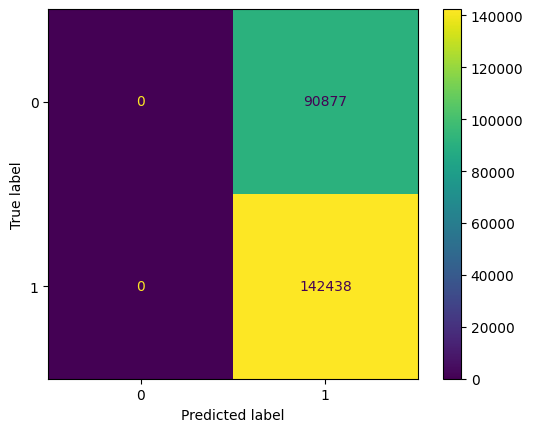

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [22]:
y_proba = model.predict_proba(x_test)
print(y_proba)
print(y_pred)

[[0.38035591 0.61964409]
 [0.4347574  0.5652426 ]
 [0.40834791 0.59165209]
 ...
 [0.36917889 0.63082111]
 [0.43403269 0.56596731]
 [0.42328233 0.57671767]]
[1 1 1 ... 1 1 1]


In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, recall, precision, f1)

0.6104965390137796 1.0 0.6104965390137796 0.7581469742091214


In [24]:
y_true = y_test - 1
y_true

396722   -1
307435    0
113124   -1
179970   -1
758709   -1
         ..
376035   -1
432901    0
775528   -1
217589   -1
492171    0
Name: STATUS, Length: 233315, dtype: int32

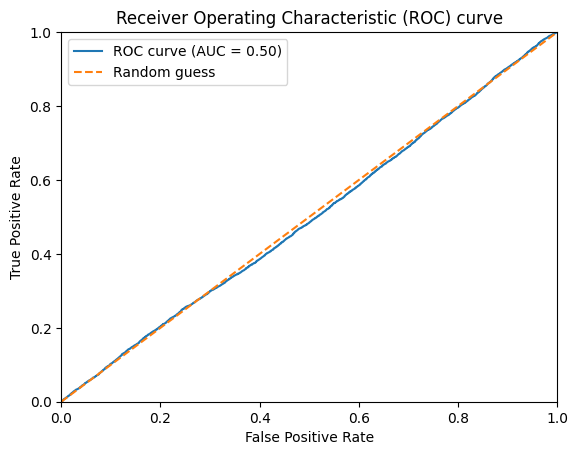

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities and true labels
y_true = np.array(y_test)
y_prob = y_proba[:,1]
# Compute fpr, tpr, thresholds and roc_auc
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

#Построение кривой
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_train, x_test, y_train, y_test = train_test_split(df.drop(['STATUS'], axis = 1), df['STATUS'], test_size = 0.3)
model = LinearDiscriminantAnalysis().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 14290,  76661],
       [ 10639, 131725]], dtype=int64)

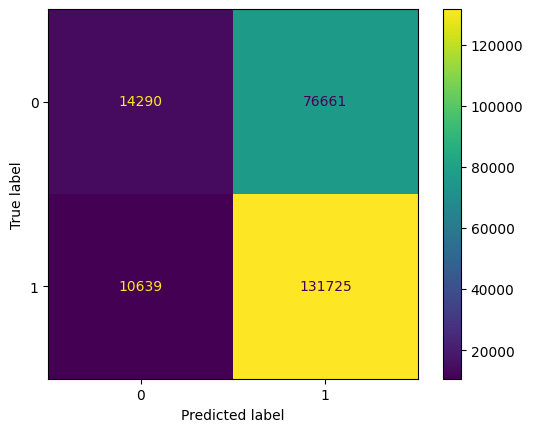

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
from sklearn.metrics import accuracy_score,f1_score
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc, recall, precision, f1)

0.6258277436084264 0.9252690286870277 0.6321202000134366 0.7511047754811119


In [30]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(df.drop(['STATUS'], axis = 1), df['STATUS'], test_size = 0.3)
tree = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = tree.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc,f1)

0.6831236740029574 0.7342582940943891


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(df.drop(['STATUS'], axis = 1), df['STATUS'], test_size = 0.3)
gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Количество неправильно помеченных точек из общего числа  %d точек: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Количество неправильно помеченных точек из общего числа  233315 точек: 90688


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(df.drop(['STATUS'], axis = 1), df['STATUS'], test_size = 0.3)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Количество неправильно помеченных точек из общего числа  %d точек: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Количество неправильно помеченных точек из общего числа  233315 точек: 87567
